In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

import tracemalloc

# Aufgabe 1

Interpolieren Sie mithilfe des Verfahrens von Aitken-Neville (s.Blatt 9 Aufgabe 3) die Funktionen

$f(x) = \sin(8x^2 + 2)$

$g(x) = |x|$

$h(x) = \frac{1}{(1+100x^2)}$ 

auf dem Intervall $[-1,1]$ durch Polynome von Grad n. Verwenden Sie als Sützstellen, äquidistante Unterteilung und Chebyshev Punkte. Bis zum Grad 10 und dann noch einen Plot.

## Verfahren nach Aitken-Neville

$k,n \in \mathbb{N}$ mit $k + m \leq n$ 

Es gilt die folgende Rekursionsformel

$P_{[k,0]}(x) = y_k$

$P_{[k,m]}(x) = \frac{(x-x_k)P_{[k+1,m-1]} - (x-x_{k+m})P_{[k,m-1]}(x)}{x_{k+m}-x_k}$

### Backwards Iteration approach

In [13]:

def aitken_neville_matrix(x_vals, y_vals, x):
    """
    Aitken Neville Algorith with Matrix Implementation 

    Attributes:
        x_vals: array
            array containing our nodes
        y_vals: array
            array containing the y values at the nodes
        x: float
            the point we want to interpolate
        
    """
    n = len(x_vals)
    # Creates the P[k,m] matrix as defined in Blatt 9
    P = np.zeros((n, n))
    
    # The first collumn are just the y values
    for k in range(n):
        P[k, 0] = y_vals[k]
    
    # Apply the algrithm to fill up the values
    for m in range(1, n):
        for k in range(n - m):
            P[k, m] = ((x - x_vals[k]) * P[k+1, m-1] - (x - x_vals[k+m]) * P[k, m-1]) / (x_vals[k+m] - x_vals[k])
    
    
    # The top, row left value is our interpolated point
    return P[0, n-1]



def aitken_neville(x_vals,y_vals,x):
    """
    Aitken Neville Interpolation with a backwards iteration stored in a single array

    Attributes:

    x_vals: Array
        The array of nodes
    y_vals: Array
        The y values at the nodes
    x: float
        The point where we want to interpolate our polynomial 
    """
    n = len(x_vals)

    p = np.copy(y_vals)

    for k in range(1,n):
        for i in range(n-1,k-1,-1):
            p[i] = ((x - x_vals[i-k])*p[i] - (x-x_vals[i])*p[i-1])/(x_vals[i]-x_vals[i-k])

    return p[n-1]







### Next the Visualization

Here we have a Polynomial of Degree 10 in the Intervall $[-1,1]$

Further this time i measure the time of this algorithm and also compare the RAM usage

Algorithm Run time: 1.418945074081421
Ram Usage (Current / Peak (32358, 34380)


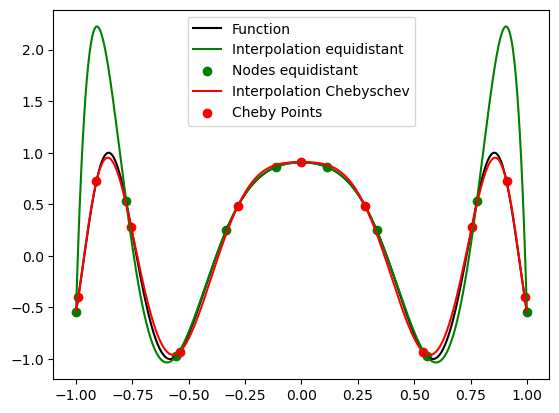

Algorithm Run time: 1.4469828605651855
Ram Usage (Current / Peak (28088, 29064)


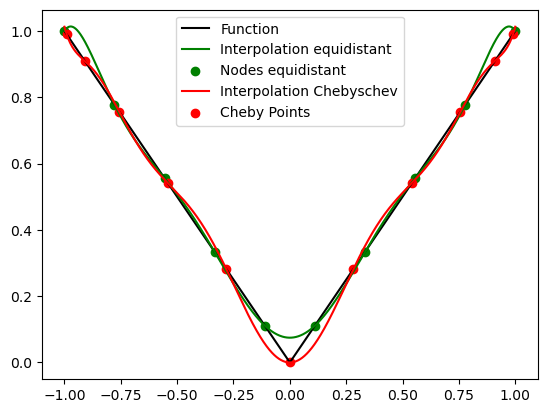

Algorithm Run time: 1.4112498760223389
Ram Usage (Current / Peak (27033, 28009)


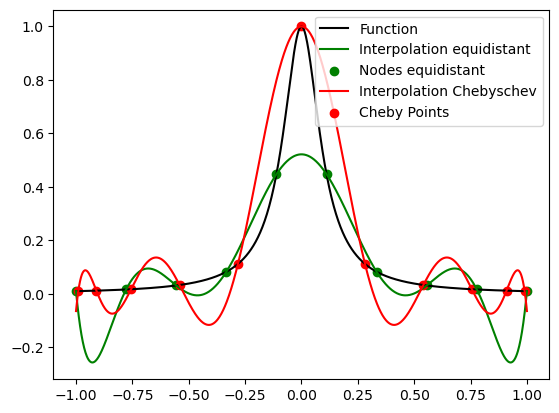

In [64]:
deg = 10
a = -1
b = 1

def cheby_points(n):
    return np.cos((2*np.arange(n+1)+ 1)* np.pi / (2*(n+1)))


def interpolation(f,a,b,d):
    """   
    Carries out the Aitken-Neville Interpolation with additional visualization
    """
    start_time = time.time() # Measure run time
    tracemalloc.start() # monitor ram usage
    
    # This is then number of nodes for our interpolation
    n = deg 
 
    # Äquidistanced Points
    x_eq = np.linspace(-1,1,n)
    x_cheby = cheby_points(n)

    # Calculate the function values
    y_eq = f(x_eq)
    y_cheby = f(x_cheby)

    # Polynomial x values
    poly_x = np.linspace(a,b,1000)

    # initialize both the interpolated polynomials

    poly_equi = np.zeros(1000)
    poly_cheby = np.zeros(1000)

    # Fill up the values with aitken-neville
    for i in range(len(poly_x)):
        poly_equi[i] = aitken_neville(x_eq,y_eq,poly_x[i])
        poly_cheby[i] = aitken_neville(x_cheby,y_cheby,poly_x[i])
    
    print("Algorithm Run time:", (time.time()- start_time))

    print("Ram Usage (Current / Peak", tracemalloc.get_traced_memory())

    tracemalloc.stop()
    
    # Insert the equidistant interpolation into a plot
    plt.plot(poly_x,f(poly_x), color="black",label="Function")
    plt.plot(poly_x,poly_equi,color = "green", label="Interpolation equidistant")
    plt.scatter(x_eq,y_eq, color = "green",label="Nodes equidistant")
    # Now do the same thing for the cheby interpolation
    plt.plot(poly_x,poly_cheby,color="red", label="Interpolation Chebyschev")
    plt.scatter(x_cheby,y_cheby, color = "red", label="Cheby Points")
    plt.plot()
    plt.legend()
    plt.show()
    


interpolation(lambda x: np.sin(8*x**2 + 2),a,b,deg)
interpolation(lambda x: np.abs(x),a,b,deg)
interpolation(lambda x: 1/(1+ 100*x**2),a,b,deg)

Just out of pure interest do the same thing with the coefficient matrix

Algorithm Run time: 1.590075969696045
Ram Usage (Current / Peak (32852, 35701)


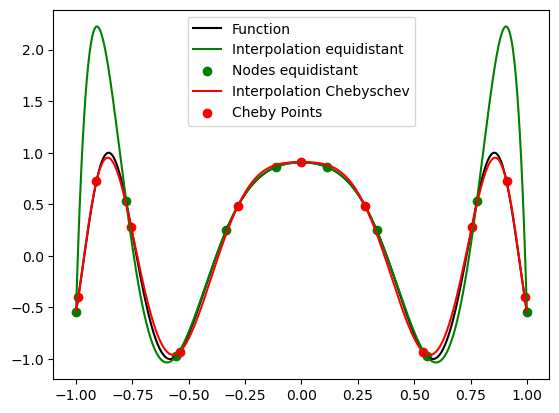

Algorithm Run time: 1.572403907775879
Ram Usage (Current / Peak (27105, 28081)


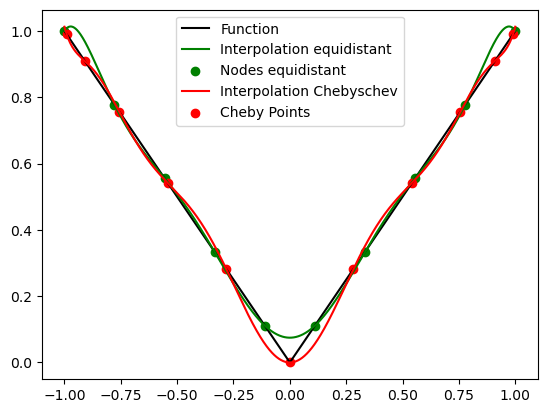

Algorithm Run time: 1.5750761032104492
Ram Usage (Current / Peak (27198, 28174)


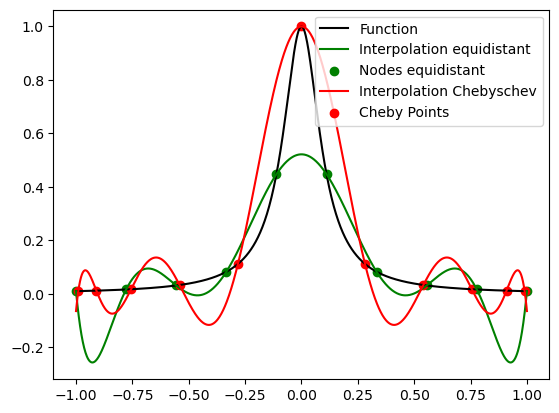

In [65]:
deg = 10
a = -1
b = 1

def cheby_points(n):
    return np.cos((2*np.arange(n+1)+ 1)* np.pi / (2*(n+1)))


def interpolation(f,a,b,d):
    """   
    Carries out the Aitken-Neville Interpolation with additional visualization
    """
    start_time = time.time() # Measure run time
    tracemalloc.start() # monitor ram usage
    
    # This is then number of nodes for our interpolation
    n = deg 
 
    # Äquidistanced Points
    x_eq = np.linspace(-1,1,n)
    x_cheby = cheby_points(n)

    # Calculate the function values
    y_eq = f(x_eq)
    y_cheby = f(x_cheby)

    # Polynomial x values
    poly_x = np.linspace(a,b,1000)

    # initialize both the interpolated polynomials

    poly_equi = np.zeros(1000)
    poly_cheby = np.zeros(1000)

    # Fill up the values with aitken-neville
    for i in range(len(poly_x)):
        poly_equi[i] = aitken_neville_matrix(x_eq,y_eq,poly_x[i])
        poly_cheby[i] = aitken_neville_matrix(x_cheby,y_cheby,poly_x[i])
    
    print("Algorithm Run time:", (time.time()- start_time))

    print("Ram Usage (Current / Peak", tracemalloc.get_traced_memory())

    tracemalloc.stop()
    
    # Insert the equidistant interpolation into a plot
    plt.plot(poly_x,f(poly_x), color="black",label="Function")
    plt.plot(poly_x,poly_equi,color = "green", label="Interpolation equidistant")
    plt.scatter(x_eq,y_eq, color = "green",label="Nodes equidistant")
    # Now do the same thing for the cheby interpolation
    plt.plot(poly_x,poly_cheby,color="red", label="Interpolation Chebyschev")
    plt.scatter(x_cheby,y_cheby, color = "red", label="Cheby Points")
    plt.plot
    plt.legend()
    plt.show()
    


interpolation(lambda x: np.sin(8*x**2 + 2),a,b,deg)
interpolation(lambda x: np.abs(x),a,b,deg)
interpolation(lambda x: 1/(1+ 100*x**2),a,b,deg)

# Aufgabe 2

Implementieren Sie die diskrete Fouriertransformation (DFT), also berechnen Sie die Fourier-
koeffizienten näherungsweise mit der Trapezregel. Testen Sie Ihr Programm an der Funktion
aus Aufgabe (5), variieren Sie N und beobachten Sie die Konvergenz

$\tilde{f}_N(k) \to \tilde{f}(k)$ für $|k|\leq \frac{N}{2}$

## Vorgangsweise bei der Diskreten Fourier Transformation

Betrachte $f$ stückweise glatt und $2\pi$ periodisch. Für eine allgemeine Periodizität haben wir affine Transformation

$[a,b] \to [0,2\pi]: x \to 2\pi \frac{x-a}{b-a}$

Sei $N \in \mathbb{N}$ fest gewählt und $x_l = \frac{2\pi l}{N}$ mit $l = 0,...,N-1$

eine äquidistante Unterteilung von $[0,2\pi]$. Nun werden also Fourier-Koeffizienten Näherungsweise berechnet. Da $f(x_N)=f(2\pi)=f(0)=f(x_0)$ gilt ergibt sich die Trapezregel

$\tilde{f}_N(k) := \frac{1}{N} \sum_{l = 0}^{N-1} f(x_l) e^{-ikx_l} \approx \tilde{f}(k)$

### First of the Function

we have the function $f[0,\pi] \to x(\pi-x)$

As given in the E-Mail this has to be defined piecewise 

$f(x) = x(\pi - x)$ if $x \in [0,\pi]$

$f(x) = (x-2\pi)*(\pi-x)$ if $x \in [\pi, 2\pi]$ 

In [66]:
def f(x):
    if 0 <= x <= np.pi:
        return x * (np.pi - x)
    elif np.pi < x <= 2 * np.pi:
        return (x - 2 * np.pi) * (np.pi - x)
    else:
        raise ValueError("x is out of the valid range [0, 2pi]")

In [67]:
# DFT Algorithm

def dft(y,k):
    """   
    Discrete Fourier Transform using the trapezoidal rule

    k: array
        a array of frequency indeces
    """
    n = len(y)
    f_k = np.zeros(len(k),dtype=complex) # we also need complex values here

    for i in range(len(k)):
        for l in range(n):
            # First off we calculate the point x_l in every interval
            x_l = 2* np.pi * l /n
            f_k[i] += y[l] * np.exp(-1j * k[i]*x_l)
    return f_k/n # Finally make the Normalization with f/n




# Plot the Function

We can see in the Interval $[0, 2*\pi]$ we basically have this curved function

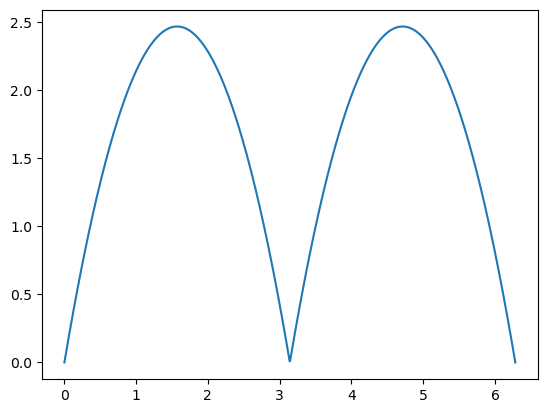

In [68]:
x_vals = np.linspace(0,2*np.pi,1000)
y_vals = [f(x) for x in x_vals]

plt.plot(x_vals,y_vals)
plt.show()

# Visualize the converge

We can now visualize the convergence of our Fourier Coefficients and compare our result also with the numpy method

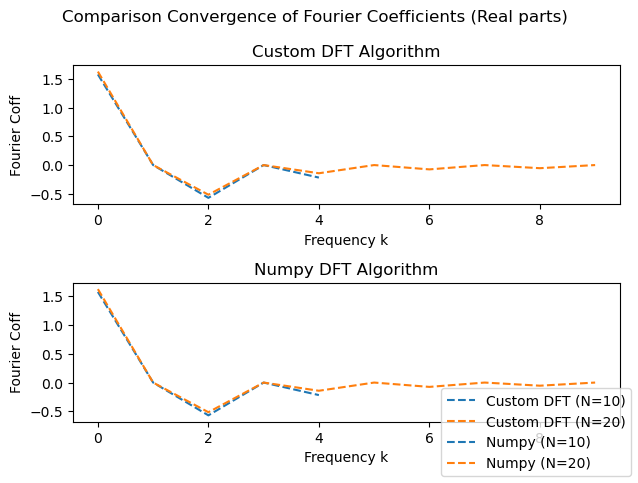

In [69]:
def evaluate_dft_for_varying_N(N_values):
    
    fig,ax = plt.subplots(2)

    for N in N_values:
        
        # Equidistant Ponints and exclude the endpoint
        x_vals = np.linspace(0, 2 * np.pi, N, endpoint=False)
        
        # Evaluate the function F at the sample point
        y_vals = np.array([f(x) for x in x_vals])
        
        #k_vals = np.linspace(0,N,endpoint=False)
        k_vals = np.arange(N/2 if N%2==0 else (N-1)/2)
        
        # Compute the DFT for the current N
        dft_vals = dft(y_vals, k_vals)
        
        # Compute numpy dft values
        dft_numpy = np.fft.fft(y_vals) / N
        
        ax[0].plot(k_vals[:N // 2], dft_vals[:N // 2].real, label=f'Custom DFT (N={N})', linestyle='--')
        ax[0].set_title("Custom DFT Algorithm")
        ax[1].plot(k_vals[:N // 2], dft_numpy[:N // 2].real, label=f'Numpy (N={N})', linestyle='--')
        ax[1].set_title("Numpy DFT Algorithm")
    
    # Plot settings
    fig.suptitle("Comparison Convergence of Fourier Coefficients (Real parts)")
    fig.legend(loc="lower right")
    for ax in ax.flat:
        ax.set(xlabel="Frequency k", ylabel="Fourier Coff")
    fig.tight_layout()
    plt.show()

N_values = [10,20]
evaluate_dft_for_varying_N(N_values)

# Plot the Absolute Value for Different N Values

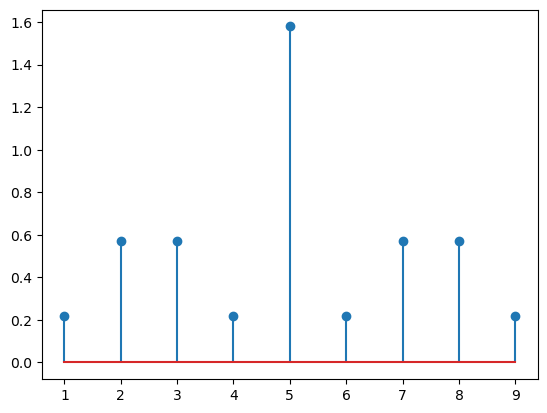

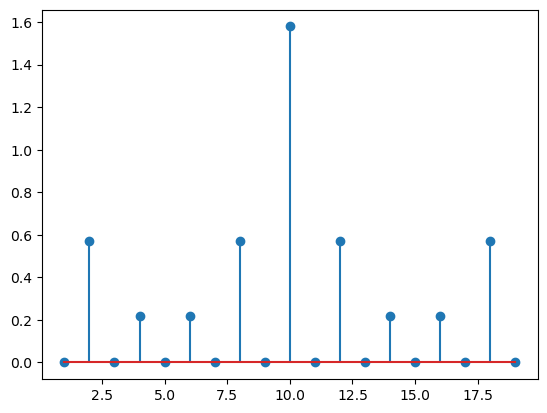

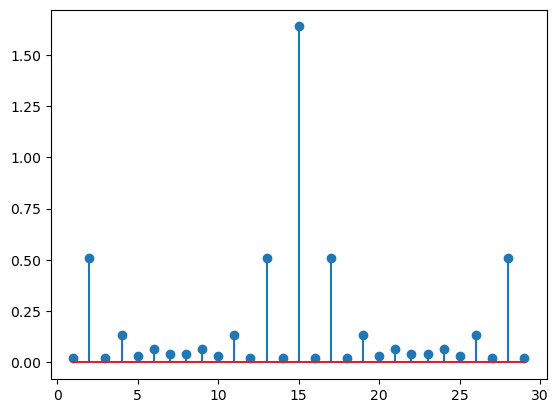

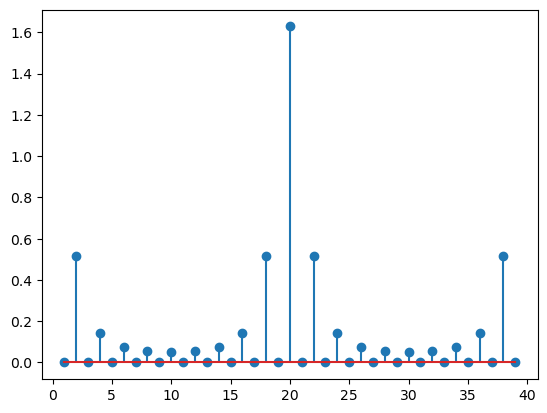

In [70]:
n_vals = [10,20,30,40]

for n in n_vals:
    step = (2*np.pi - (-2*np.pi)) / n
    x_v = np.arange(0, 2*np.pi, step)
    k_v = np.arange(1,n)
    y_v = [f(x) for x in x_v]
    dft_res = dft(y_v, k_v)
    
    plt.stem(k_v,np.abs(dft_res))
    plt.show()


## Teil B

Erweitern Sie Ihr Programm durch die Berechnung des trigonometrischen Interpolationspoly-
noms, unter Verwendung der zuvor berechneten DFT. Testen Sie Ihr Programm wieder an der
Funktion f aus Aufgabe (5) auf dem Intervall [0, 2π]. Variieren Sie die Anzahl an Stützstellen
und bestimmen Sie den Interpolationsfehler.

Betrachte hierzu den Satz 3.37 (Trigonometrisches Interpolationspolynom)


$p_N(x) := \sum_{k=-N/2}^{k=N/2 - 1}c_k e^{ikx}$



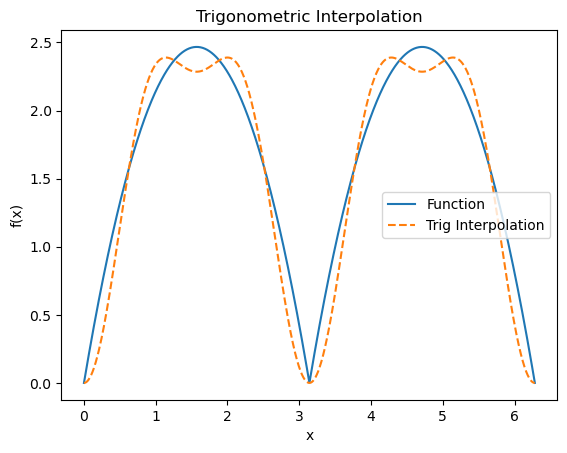

In [71]:
# so what we do is we take our 

def trigonometric_interpolation(f_k,x,N):
    """ 
    Calculates the trigonometric Interpolation:
    Basically at every x, point apply the Sum Formula to get the interpolation
    Then basically for each x, point get the real part to plot
    """
    n = len(f_k)
    k = np.arange(-N//2, N//2 + 1)
    interpolation = np.zeros_like(x, dtype=complex)
    for i in range(len(x)):
        for j in range(len(k)):
            interpolation[i] += f_k[j] * np.exp(1j *k[j] * x[i])
    return interpolation.real

N = 10
x_vals = np.linspace(0, 2*np.pi, 1000)

# Now calculate the DFT Interpolation

x_dft = np.linspace(0,2*np.pi, N, endpoint = False)
y_dft = [f(x) for x in x_dft]
k = np.arange(-N//2, N//2 + 1)
f_k = dft(y_dft,k)

interpolation = trigonometric_interpolation(f_k,x_vals,N)

plt.plot(x_vals,[f(x) for x in x_vals], label="Function")
plt.plot(x_vals, interpolation, label="Trig Interpolation", linestyle="--")
plt.legend()
plt.title("Trigonometric Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()



# Aufgabe 3

Gegeben Sei das Signal

$y(t):= sin(7t) + 0.5 sin(5t)$

an 128 äquidistanten Punkten auf dem Intervall $[0,2\pi]$. Fügen Sie den Messpunkten ein zufälliges Rauschen $≤0.75$ hinzu. 

Versuchen Sie nun, das ursprüngliche Signal zu rekonstruieren, indem
Sie das Signal fouriertransformieren (DFT aus Aufgabe (2) oder FFT, evtl. vorgefertigte Routine
verwenden, Normierung beachten!) und Fourierkoeffizienten, deren Betrag ≤ 0.125 ist, auf 0 setzen.
Vergleichen Sie das Ausgangssignal mit dem rekonstruierten Signal.

In [72]:
# First of we initialize our Parameters

N = 128 
t = np.linspace(0, 2 * np.pi, N)  
noise_level = 0.75 
threshold = 0.125  

# Next of we compute our original signal

y = np.sin(7 * t) + 0.5*np.sin(5 * t)

# Now we add a random noise with our scaling for each point

noise = np.random.uniform(-0.75, 0.75,128)

y_pert = y + noise

# So now we use numpy to perform our dft (maybe in a block below i use my own method, just to be safe)

Y = np.fft.fft(y_pert)

# Also Norm the Data in respect to the Data Points

Y = Y/len(Y)

Y[:10]


array([-0.00771002+0.j        ,  0.03346147-0.02949761j,
       -0.04969033-0.03925207j,  0.01566634-0.01585299j,
       -0.01958418-0.03373986j,  0.00471035-0.23575169j,
       -0.00939823-0.02245732j,  0.04199948-0.48738089j,
       -0.04703818+0.06562034j,  0.02584676+0.02322327j])

As you can basically also see above we still have a lot of Fourier coefficients that are close to zero, what we here do is basically to Filter out the low values with $|\hat{f}_(k)| \leq 0.125$

In [73]:
Y_filtered = np.where(np.abs(Y) > threshold, Y, 0)
print(Y_filtered)

[0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.00471035-0.23575169j
 0.        +0.j         0.04199948-0.48738089j 0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j


Lastly now we reconstruct our signal using the inverse Fourier Transform and See what we get

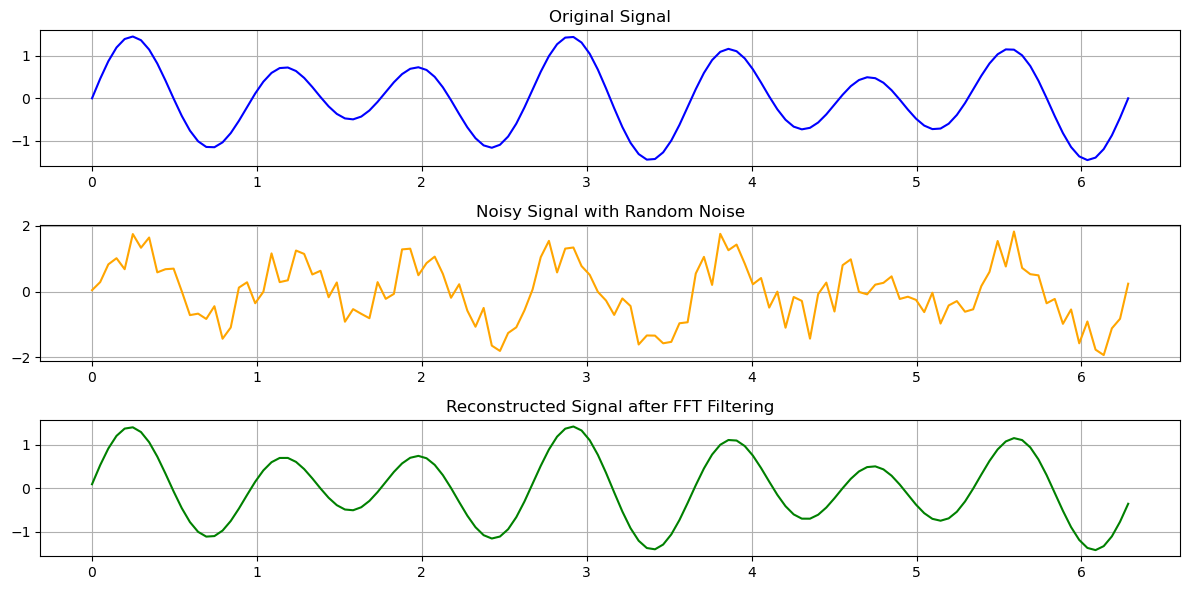

In [74]:
y_recon = np.fft.ifft(Y_filtered * len(Y_filtered)).real



plt.figure(figsize=(12, 6))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t, y, label="Original Signal", color='blue')
plt.title("Original Signal")
plt.grid()

# Noisy signal
plt.subplot(3, 1, 2)
plt.plot(t, y_pert, label="Noisy Signal", color='orange')
plt.title("Noisy Signal with Random Noise")
plt.grid()

# Reconstructed signal
plt.subplot(3, 1, 3)
plt.plot(t, y_recon, label="Reconstructed Signal", color='green')
plt.title("Reconstructed Signal after FFT Filtering")
plt.grid()

plt.tight_layout()
plt.show()

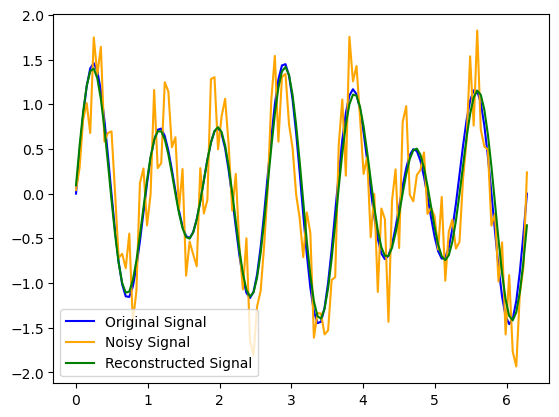

In [75]:
# Further put all into one Plot for a better Visualization

plt.plot(t, y, label="Original Signal", color='blue')
plt.plot(t, y_pert, label="Noisy Signal", color='orange')
plt.plot(t, y_recon, label="Reconstructed Signal", color='green')
plt.legend()
plt.show()